In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Text3D
import scipy as sp
from scipy.integrate import odeint
import math

In [52]:
#constante Gravitationnelle (m**3*kg**(-1)*s**2)
G= 6.6742*10**(-11)
#Masse de Saturne
Ms=5.683*10**26
#rayon de Saturne (km)
r_saturne=58232
#rayon min (km)
r_min=60000
#rayon max (km)
r_max=302500
#champ magnétique (en Tesla)
Bo=1
#masse d'une particule (kg)
m=1
#charge (C)
q=1
#vitesse initiale (m/s)
Vo=0.1
#angle particule (radian)
alpha=0.5
#position x initiale
x_int=-0.1
#position y initiale
y_int=0
#position z initiale
z_int=0
#temps maximal
t_max=100

w=q*Bo/m

In [53]:
def rayon(r_min, r_max):
    """int*int->int"""
    return np.random.randint(r_min,r_max)*10**3

In [54]:
r=rayon (r_min, r_max)

In [55]:
def acceleration(G,Ms,r):
    """float*float*int*int->float"""
    return (-G*Ms)/r**2

In [56]:
acceleration(G,Ms,r)

-0.5510254986564104

In [57]:
def vitesse(G,Ms,r):
    """float*float*int*int->float"""
    return (np.sqrt((G*Ms)/(r)))
    

In [58]:
vitesse(G,Ms,r)

12023.672604657522

In [59]:
def periode(G,Ms,r):
    """float*float*int*int->float"""
    #vitesse:float
    v=vitesse(G,Ms,r)
    return (np.pi*2)*r/(v*86400)

In [60]:
p=periode(G,Ms,r)*86400

In [61]:
def angle(G,Ms,r,t):
    #periode
    p=periode(G,Ms,r)
    #vitesse angulaire
    omg=(np.pi*2)/(p*86400)
    return (omg*t)*(180/np.pi)

In [62]:
angle (G,Ms,r,p)

360.0

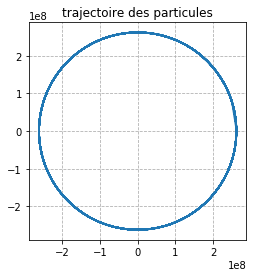

In [63]:
def list_t(G,Ms,r):
    a=angle(G,Ms,r,0)
    i=60
    theta=[]
    while (a<=360.0):
        theta.append(a)
        i=i+60
        a=angle(G,Ms,r,i)
        
    return theta

theta = list_t(G,Ms,r)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)
plt.title("trajectoire des particules")
ax.plot(x1, x2)
ax.set_aspect(1)
plt.grid(linestyle='--')


In [64]:
len (theta)

2285

C:\Users\safiy\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


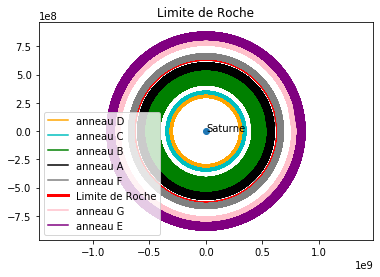

In [65]:
import numpy as np
import matplotlib.pyplot as plt
plt.title("Limite de Roche")

theta=list_t(G,Ms,r)
plt.scatter(0,0,)
i=1.15
while(i<1.2795):
    x=i*r*np.cos(theta)
    y=i*r*np.sin(theta)
    if(i==1.15):
        plt.plot(x,y,'orange',label="anneau D")
    if(i!=1.15):
        plt.plot(x,y,'orange') 
    i=i+0.001

i=1.282
while(i<1.336):
    x=i*r*np.cos(theta)
    y=i*r*np.sin(theta)
    if(i==1.282):
        plt.plot(x,y,'c',label="anneau C")
    if(i!=1.282):
        plt.plot(x,y,'c')
    i=i+0.001
    
i=1.5799
while(i<2.018):
    x=i*r*np.cos(theta)
    y=i*r*np.sin(theta)
    if(i==1.5799):
        plt.plot(x,y,'g',label="anneau B")
    if(i!=15799):
        plt.plot(x,y,'g')
    i=i+0.001

i=2.098
while(i<2.294):
    x=i*r*np.cos(theta)
    y=i*r*np.sin(theta)
    if(i==2.098):
        plt.plot(x,y,'k',label="anneau A")
    if(i!=2.098):
        plt.plot(x,y,'k')
    i=i+0.001

i=2.407
while(i<2.44):
    x=i*r*np.cos(theta)
    y=i*r*np.sin(theta)
    if(i==2.407):
        plt.plot(x,y,'grey',label="anneau F")
    if(i!=2.407):
        plt.plot(x,y,'grey')
    i=i+0.001

x=2.44*r*np.cos(theta)
y=2.44*r*np.sin(theta)
plt.plot(x,y,'r',linewidth=3,label="Limite de Roche")
i=2.46
while(i<2.602):
    x=i*r*np.cos(theta)
    y=i*r*np.sin(theta)
    plt.plot(x,y,'grey')
    i=i+0.001
i=2.92
while(i<3.108):
    x=i*r*np.cos(theta)
    y=i*r*np.sin(theta)
    if(i==2.92):
        plt.plot(x,y,'pink',label="anneau G")
    if(i!=2.92):
        plt.plot(x,y,'pink')
    i=i+0.001
i=3.108
while(i<3.335):
    x=i*r*np.cos(theta)
    y=i*r*np.sin(theta)
    if(i==3.108):
        plt.plot(x,y,'purple',label="anneau E")
    if(i!=3.108):
        plt.plot(x,y,'purple')
    i=i+0.001
plt.text(0, 0, 'Saturne')
plt.legend()
plt.axis("equal")

plt.show()

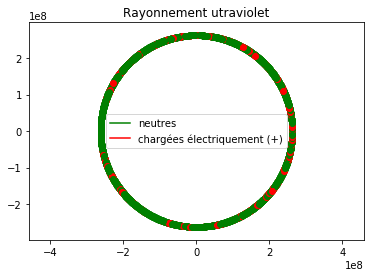

In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.title("Rayonnement utraviolet")
from random import *
i=0
while(i<len(theta)):
    j=randint(0, 5)
    if(j==1):
        x=r*np.cos(theta[i])
        y=r*np.sin(theta[i])
        plt.scatter(x,y,c='r', linewidth=1)
    if(j!=1):
        x=r*np.cos(theta[i])
        y=r*np.sin(theta[i])
        plt.scatter(x,y,c='g', linewidth=1)

    i=i+1
plt.plot(x, y, "g", label="neutres")
plt.plot(x, y, "r", label="chargées électriquement (+)")
plt.axis("equal")
plt.legend()
plt.show()

In [67]:
x0=-0.1
y0=0
z0=0
Vx0=0
Vy0=Vo*math.cos(alpha)
Vz0=Vo*math.sin(alpha)
t=np.linspace(0,100)


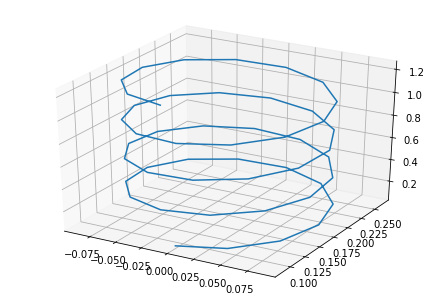

In [68]:
fig = plt . figure (1)
ax = Axes3D ( fig )
L1=np.array([Vx0,Vy0,Vz0])
def mirr_pos(v,t):
    x,y,z=v
    return[Vo*math.cos(alpha)*math.cos(w*t),Vo*math.cos(alpha)*math.sin(w*t),Vo*math.sin(alpha)]

t = np.linspace(0,25)
sol= sp.integrate.odeint(mirr_pos,L1,t)
X,Y,Z=sol[:,0],sol[:,1],sol[:,2]

ax.plot(X,Y,Z)

plt.show()

In [69]:
import tkinter as Tk
# Creation de la fenetre principale
Mafenetre = tk.Tk()
Mafenetre.title("Saturne")

# Creation d'un widget Canvas
Canevas = tk.Canvas(Mafenetre,height=HAUTEUR,width=LARGEUR,bg='black')
Canevas.pack(padx=5,pady=5)
# Creation d'un objet graphique
# Création d'un widget vitesse

NameError: name 'tk' is not defined